# **Inisialisasi**

In [ ]:
!pip install transformers Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory       = StemmerFactory()
stemmer       = factory.create_stemmer()
import random
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Data Preperation**


In [ ]:
#Load file json
def load_json_file(filename):
    with open(filename) as f:
        file = json.load(f)
    return file

filename = '/content/intents.json'
intents = load_json_file(filename)

In [ ]:
def create_df(intents):
    patterns = []
    tags = []

    for intent in intents['intents']:
        for pattern in intent['patterns']:
            patterns.append(pattern)
            tags.append(intent['tag'])

    df = pd.DataFrame({
        'patterns': patterns,
        'tag': tags
    })

    return df

df = create_df(intents)
df

,patterns,tag
0,Apa itu gempa bumi?,pengertian_gempa
1,Jelaskan gempa bumi,pengertian_gempa
2,Pengertian dari gempa bumi,pengertian_gempa
3,Gempa bumi itu apa?,pengertian_gempa
4,Pengertian gempa bumi,pengertian_gempa
...,...,...
1049,Bagaimana saya dapat memberikan kontribusi kep...,peran_yang_bisa_dilakukan
1050,Apakah ada cara bagi saya untuk membantu merin...,peran_yang_bisa_dilakukan
1051,Saya ingin memberikan dukungan kepada korban g...,peran_yang_bisa_dilakukan
1052,Adakah peran yang dapat saya ambil untuk mendu...,peran_yang_bisa_dilakukan


In [ ]:
labels = df['tag'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['pengertian_gempa',
 'penyebab_gempa',
 'jenis_gempa',
 'gempa_tektonik',
 'gempa_vulkanik',
 'gempa_dampak_meteorit',
 'gempa_buatan',
 'skala_gempa',
 'alat_ukur_gempa',
 'richter',
 'magnitudo',
 'tingkatan_skala_magnitudo',
 'perbedaan_skala_ritcher_dan_magnitudo',
 'hiposentrum_dan_episentrum',
 'dampak_gempa',
 'seismik',
 'seismologi',
 'P_wave',
 'S_wave',
 'tsunami',
 'tsunami_akibat_gempa',
 'tsunami_terparah_indonesia',
 'bisakah_prediksi_gempa',
 'bisakah_prediksi_tsunami',
 'hewan_prediksi_gempa',
 'wilayah_rawan_gempa',
 'patahan',
 'patahan_naik',
 'patahan_normal',
 'patahan_geser',
 'patahan_divergen',
 'patahan_terbalik',
 'patahan_miring',
 'gempa_akibat_patahan',
 'lempeng',
 'lapisan_bumi',
 'kerak_bumi',
 'jenis_kerak',
 'mantel',
 'inti',
 'mitigasi',
 'persiapan',
 'rencana_tanggap',
 'siap_dokumen',
 'mitigasi_dalam_gedung',
 'mitigasi_dalam_rumah',
 'mitigasi_dalam_lift',
 'mitigasi_luar_ruangan',
 'mitigasi_tempat_ramai',
 'tempat_paling_aman',
 'setelah_gem

In [ ]:
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

In [ ]:
id2label

{0: 'pengertian_gempa',
 1: 'penyebab_gempa',
 2: 'jenis_gempa',
 3: 'gempa_tektonik',
 4: 'gempa_vulkanik',
 5: 'gempa_dampak_meteorit',
 6: 'gempa_buatan',
 7: 'skala_gempa',
 8: 'alat_ukur_gempa',
 9: 'richter',
 10: 'magnitudo',
 11: 'tingkatan_skala_magnitudo',
 12: 'perbedaan_skala_ritcher_dan_magnitudo',
 13: 'hiposentrum_dan_episentrum',
 14: 'dampak_gempa',
 15: 'seismik',
 16: 'seismologi',
 17: 'P_wave',
 18: 'S_wave',
 19: 'tsunami',
 20: 'tsunami_akibat_gempa',
 21: 'tsunami_terparah_indonesia',
 22: 'bisakah_prediksi_gempa',
 23: 'bisakah_prediksi_tsunami',
 24: 'hewan_prediksi_gempa',
 25: 'wilayah_rawan_gempa',
 26: 'patahan',
 27: 'patahan_naik',
 28: 'patahan_normal',
 29: 'patahan_geser',
 30: 'patahan_divergen',
 31: 'patahan_terbalik',
 32: 'patahan_miring',
 33: 'gempa_akibat_patahan',
 34: 'lempeng',
 35: 'lapisan_bumi',
 36: 'kerak_bumi',
 37: 'jenis_kerak',
 38: 'mantel',
 39: 'inti',
 40: 'mitigasi',
 41: 'persiapan',
 42: 'rencana_tanggap',
 43: 'siap_dokumen

In [ ]:
label2id

{'pengertian_gempa': 0,
 'penyebab_gempa': 1,
 'jenis_gempa': 2,
 'gempa_tektonik': 3,
 'gempa_vulkanik': 4,
 'gempa_dampak_meteorit': 5,
 'gempa_buatan': 6,
 'skala_gempa': 7,
 'alat_ukur_gempa': 8,
 'richter': 9,
 'magnitudo': 10,
 'tingkatan_skala_magnitudo': 11,
 'perbedaan_skala_ritcher_dan_magnitudo': 12,
 'hiposentrum_dan_episentrum': 13,
 'dampak_gempa': 14,
 'seismik': 15,
 'seismologi': 16,
 'P_wave': 17,
 'S_wave': 18,
 'tsunami': 19,
 'tsunami_akibat_gempa': 20,
 'tsunami_terparah_indonesia': 21,
 'bisakah_prediksi_gempa': 22,
 'bisakah_prediksi_tsunami': 23,
 'hewan_prediksi_gempa': 24,
 'wilayah_rawan_gempa': 25,
 'patahan': 26,
 'patahan_naik': 27,
 'patahan_normal': 28,
 'patahan_geser': 29,
 'patahan_divergen': 30,
 'patahan_terbalik': 31,
 'patahan_miring': 32,
 'gempa_akibat_patahan': 33,
 'lempeng': 34,
 'lapisan_bumi': 35,
 'kerak_bumi': 36,
 'jenis_kerak': 37,
 'mantel': 38,
 'inti': 39,
 'mitigasi': 40,
 'persiapan': 41,
 'rencana_tanggap': 42,
 'siap_dokumen': 4

In [ ]:
df['labels'] = df['tag'].map(lambda x: label2id[x.strip()])
df

,patterns,tag,labels
0,Apa itu gempa bumi?,pengertian_gempa,0
1,Jelaskan gempa bumi,pengertian_gempa,0
2,Pengertian dari gempa bumi,pengertian_gempa,0
3,Gempa bumi itu apa?,pengertian_gempa,0
4,Pengertian gempa bumi,pengertian_gempa,0
...,...,...,...
1049,Bagaimana saya dapat memberikan kontribusi kep...,peran_yang_bisa_dilakukan,101
1050,Apakah ada cara bagi saya untuk membantu merin...,peran_yang_bisa_dilakukan,101
1051,Saya ingin memberikan dukungan kepada korban g...,peran_yang_bisa_dilakukan,101
1052,Adakah peran yang dapat saya ambil untuk mendu...,peran_yang_bisa_dilakukan,101


In [ ]:
# Load intents.json
intents = json.loads(open('/content/intents.json').read())

# Initialize lists to hold words, classes, and documents
words = []
classes = []
documents = []
ignore_letters = ['?', '!',',','.']

# Process each pattern in the intents
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenize each pattern
        word_list = word_tokenize(pattern)
        words.extend(word_list)
        # Add the tokenized pattern and its associated tag to documents
        documents.append((word_list, intent['tag']))
        # Add the tag to classes if it's not already present
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Stem and lower each word and remove duplicates and ignored letters
words = [stemmer.stem(word) for word in words if word not in ignore_letters]
words = sorted(set(words))
classes = sorted(set(classes))

# Save the words and classes to pickle files
pickle.dump(words, open('/content/words.pkl', 'wb'))
pickle.dump(classes, open('/content/classes.pkl', 'wb'))

# Initialize the training data
training = []
output_empty = [0] * len(classes)

# Create the bag of words and output row for each document
for document in documents:
    bag =[]
    word_patterns = document[0]
    word_patterns = [stemmer.stem(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

# Shuffle the training data
random.shuffle(training)
training = np.array(training, dtype=object)

# Create train_x and train_y
train_x = np.array([i[0] for i in training])
train_y = np.array([i[1] for i in training])

# **Model Building**

# **Sequential**

In [ ]:
# Build the model
model = Sequential()
model.add(Input(shape=(len(train_x[0]),)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile the model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model
hist = model.fit(train_x, train_y, epochs=300, batch_size=32, validation_split=0.2, verbose=1)

# Save the model
model.save('chatbotmodel.h5', hist)

print('Done')

Epoch 1/300
27/27 [==============================] - 3s 14ms/step - loss: 4.6232 - accuracy: 0.0119 - val_loss: 4.6287 - val_accuracy: 0.0142
Epoch 2/300
27/27 [==============================] - 0s 4ms/step - loss: 4.6131 - accuracy: 0.0142 - val_loss: 4.6163 - val_accuracy: 0.0237
Epoch 3/300
27/27 [==============================] - 0s 7ms/step - loss: 4.5964 - accuracy: 0.0154 - val_loss: 4.6038 - val_accuracy: 0.0284
Epoch 4/300
27/27 [==============================] - 0s 5ms/step - loss: 4.5790 - accuracy: 0.0344 - val_loss: 4.5908 - val_accuracy: 0.0379
Epoch 5/300
27/27 [==============================] - 0s 5ms/step - loss: 4.5533 - accuracy: 0.0320 - val_loss: 4.5733 - val_accuracy: 0.0664
Epoch 6/300
27/27 [==============================] - 0s 5ms/step - loss: 4.5429 - accuracy: 0.0439 - val_loss: 4.5554 - val_accuracy: 0.0853
Epoch 7/300
27/27 [==============================] - 0s 5ms/step - loss: 4.5008 - accuracy: 0.0486 - val_loss: 4.5327 - val_accuracy: 0.0995
Epoch 8/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Evaluation**

In [ ]:
# Load the model and data
model = load_model('/content/chatbotmodel.h5')
classes = pickle.load(open('/content/classes.pkl', 'rb'))

# Predict the classes for the training data
predictions = model.predict(train_x)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(train_y, axis=1)

# Classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=classes)
print(report)

33/33 [==============================] - 1s 2ms/step
Classification Report:
                                       precision    recall  f1-score   support

                               P_wave       1.00      1.00      1.00        18
                               S_wave       1.00      1.00      1.00        17
                           aftershock       1.00      1.00      1.00         9
                      alat_ukur_gempa       1.00      0.92      0.96        13
                 bangunan_tahan_gempa       1.00      1.00      1.00         5
                  bantuan_pasca_gempa       1.00      1.00      1.00         8
                             basarnas       1.00      1.00      1.00        12
               bisakah_prediksi_gempa       1.00      1.00      1.00         9
             bisakah_prediksi_tsunami       1.00      1.00      1.00         9
                                 bmkg       1.00      1.00      1.00        12
                                 bnpb       1.00      

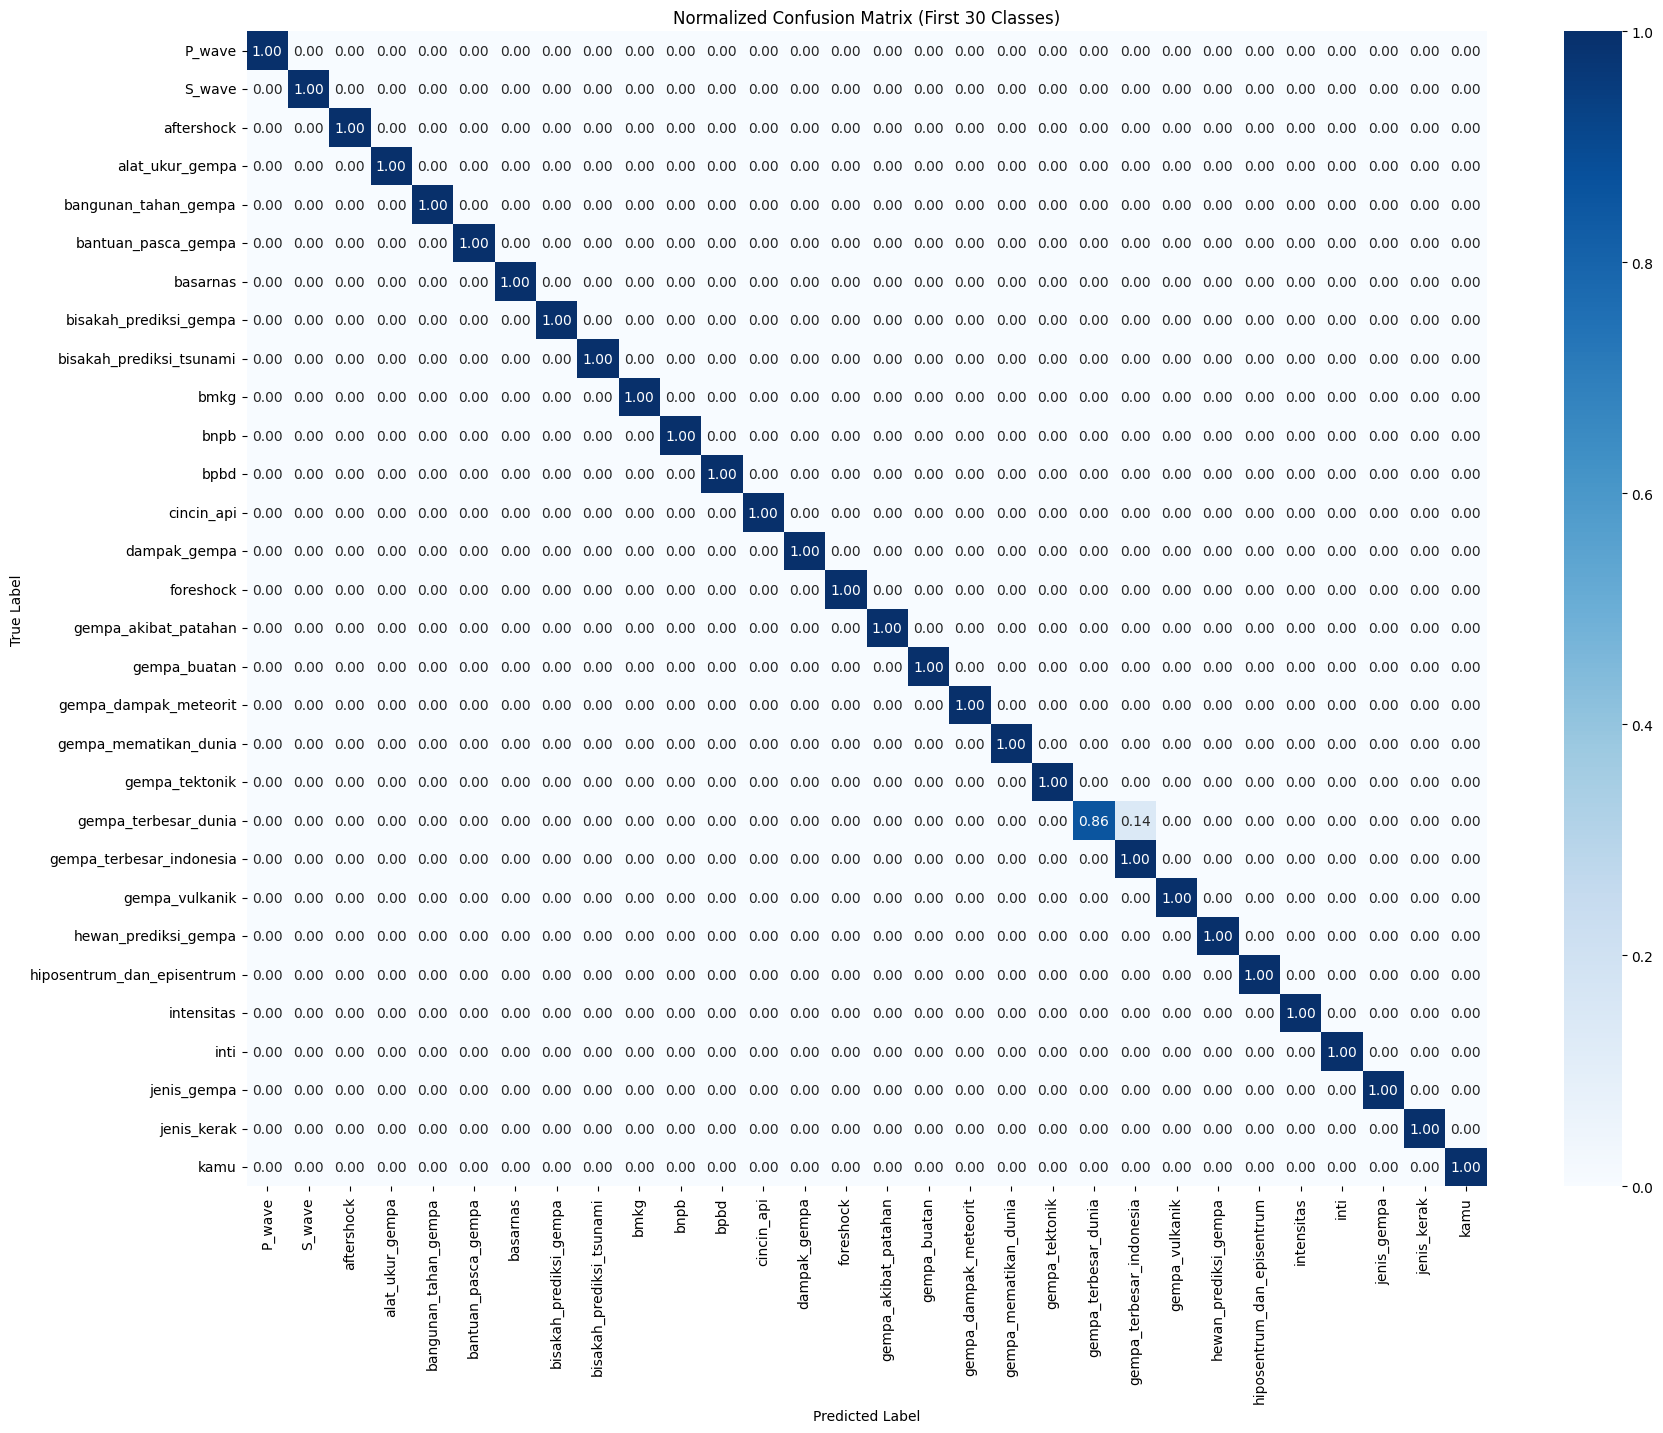

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

# Select only the first 30 classes and their corresponding rows and columns in the confusion matrix
classes_to_display = classes[:30]
cm = cm[:30, :30]

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define figure size
plt.figure(figsize=(20, 15))

# Create heatmap
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes_to_display, yticklabels=classes_to_display)

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix (First 30 Classes)')

# Display the plot
plt.show()


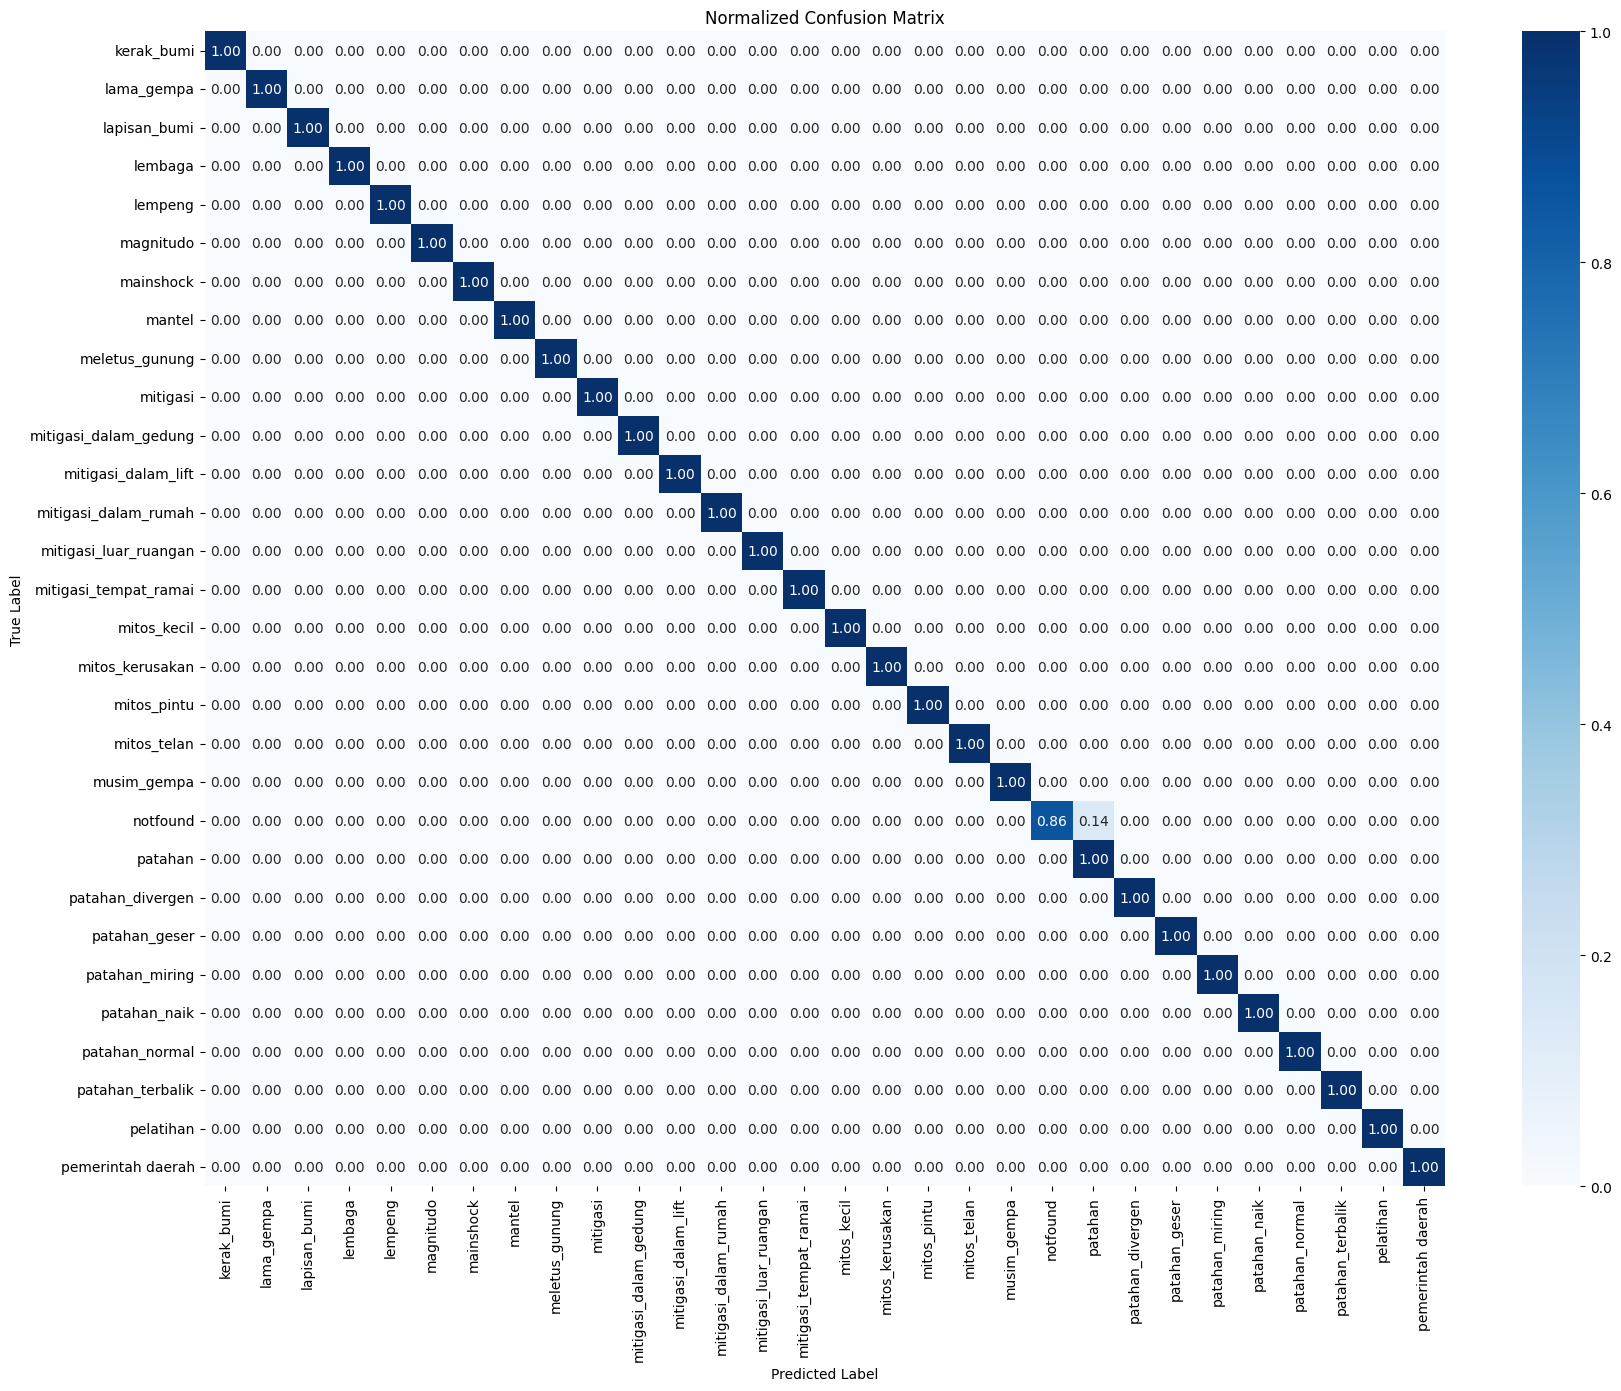

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

classes_to_display = classes[30:60]
cm = cm[:30, :30]

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define figure size
plt.figure(figsize=(20, 15))

# Create heatmap
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes_to_display, yticklabels=classes_to_display)

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')

# Display the plot
plt.show()


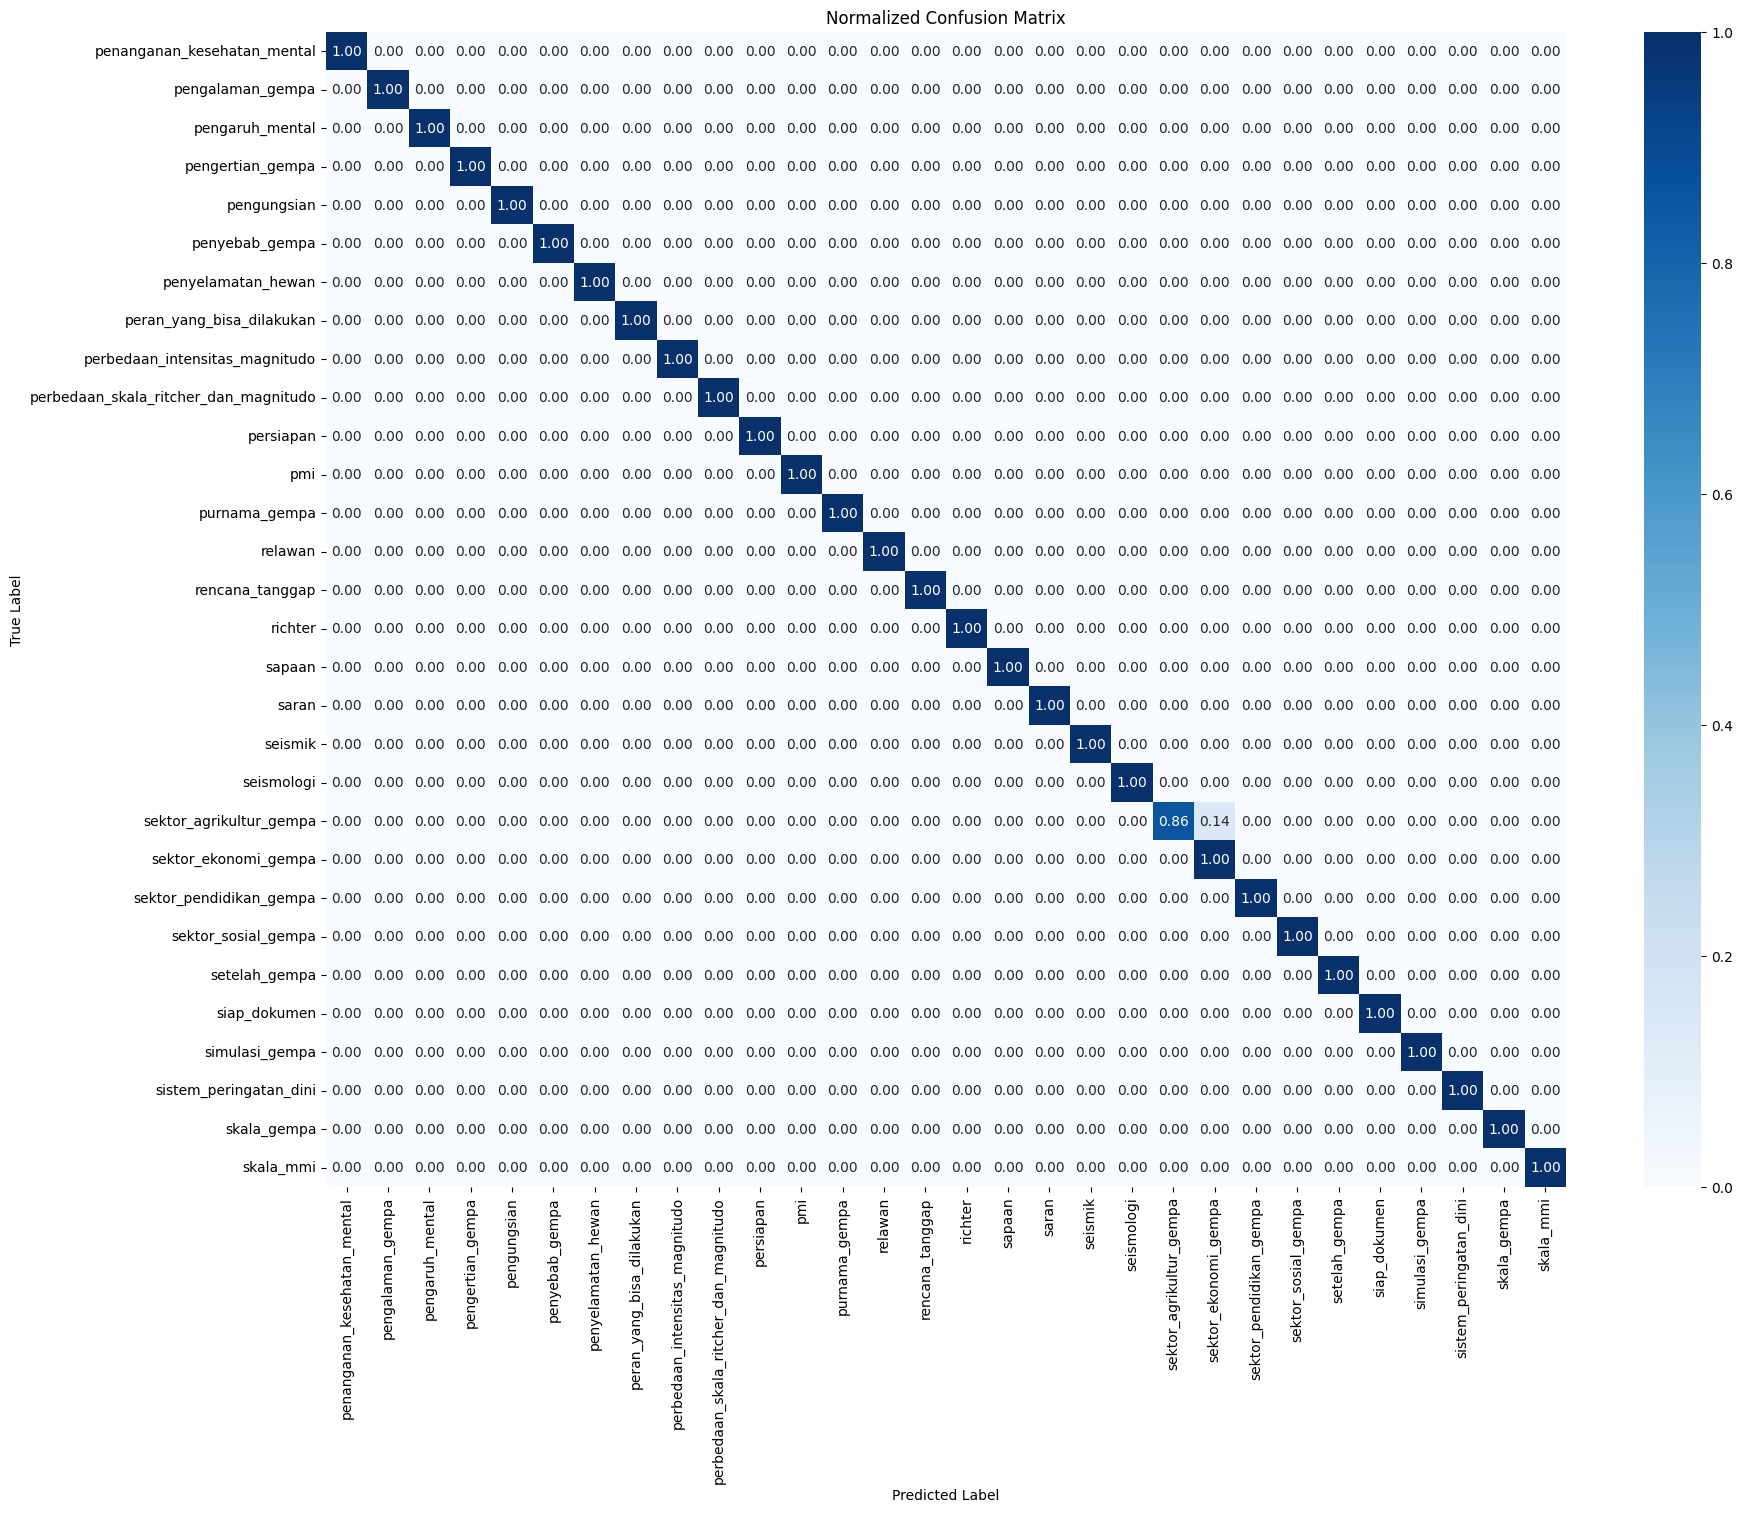

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

classes_to_display = classes[60:90]
cm = cm[:30, :30]

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define figure size
plt.figure(figsize=(20, 15))

# Create heatmap
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes_to_display, yticklabels=classes_to_display)

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')

# Display the plot
plt.show()


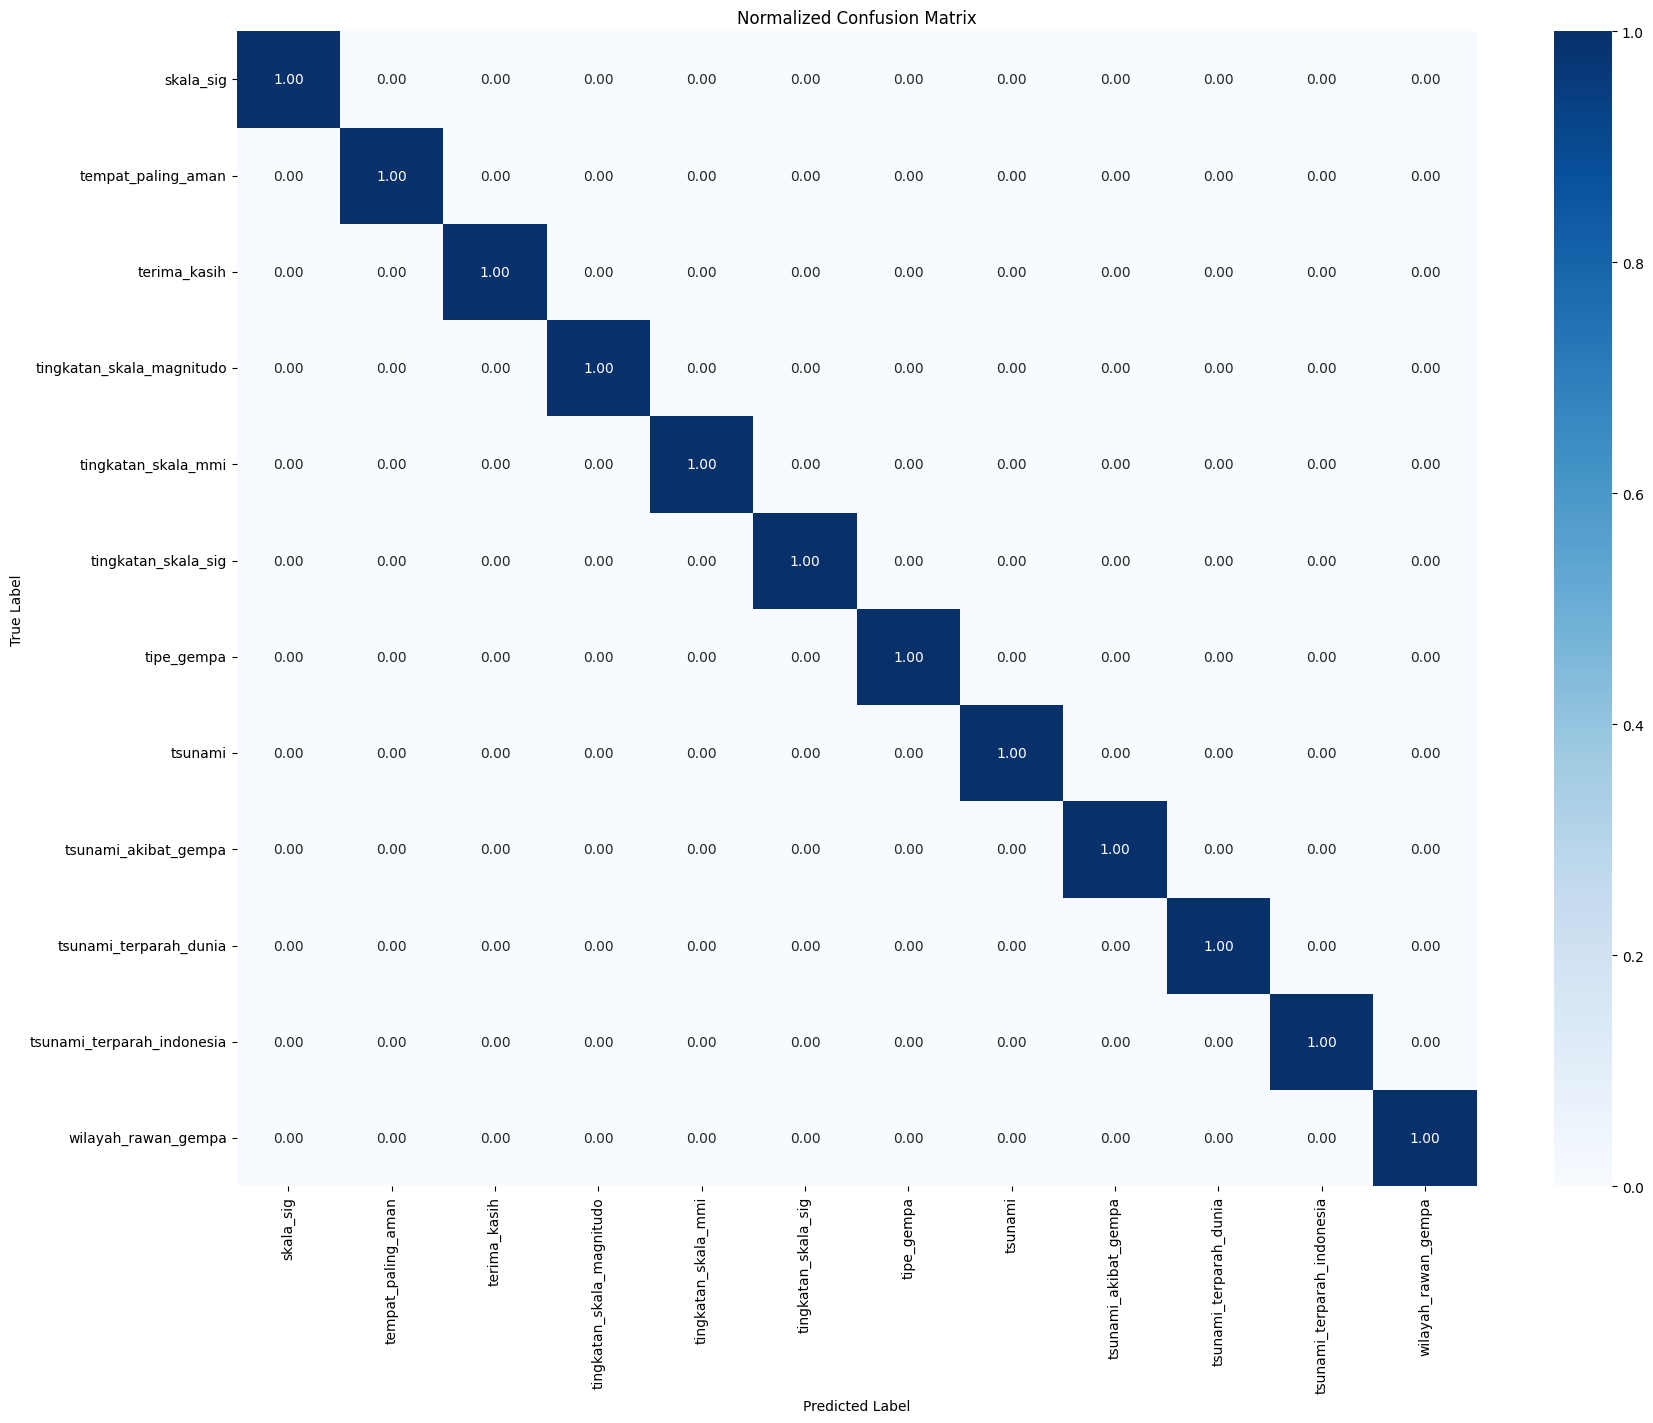

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

classes_to_display = classes[90:102]
cm = cm[:12, :12]

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define figure size
plt.figure(figsize=(20, 15))

# Create heatmap
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes_to_display, yticklabels=classes_to_display)

# Add labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')

# Display the plot
plt.show()


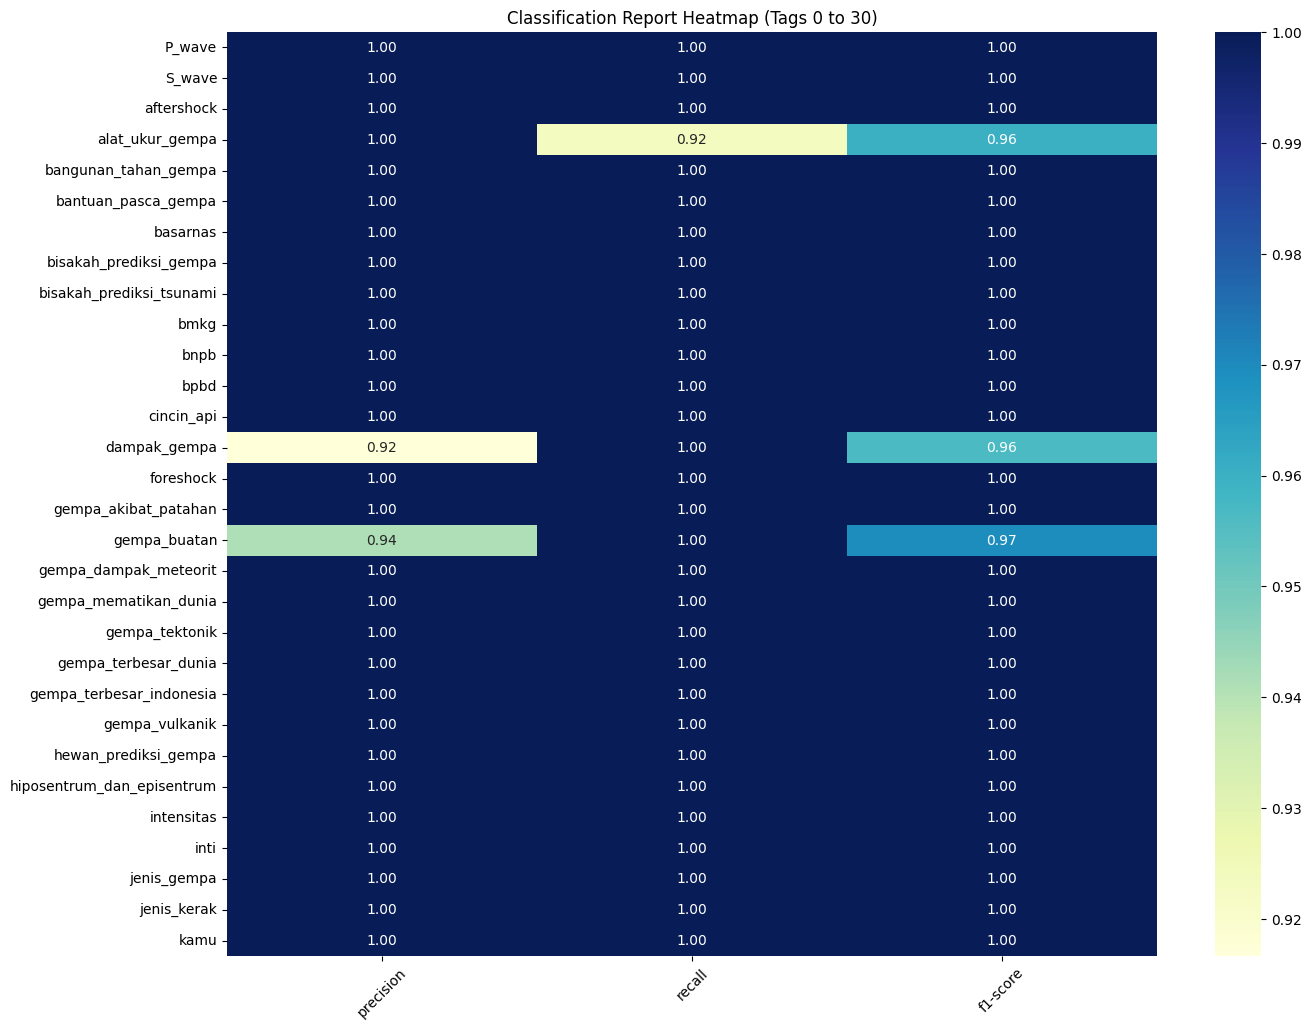

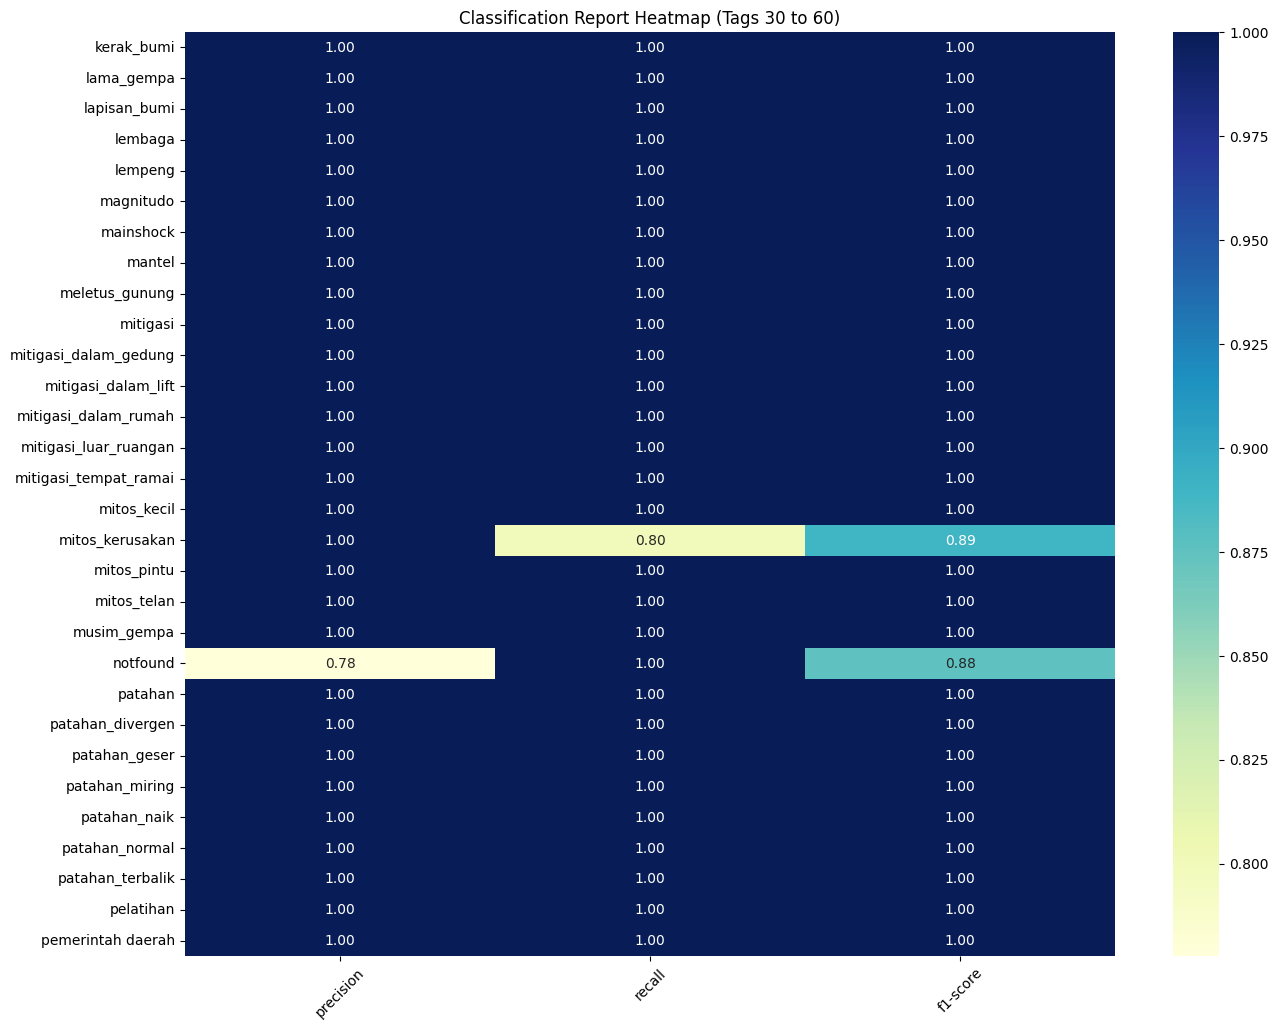

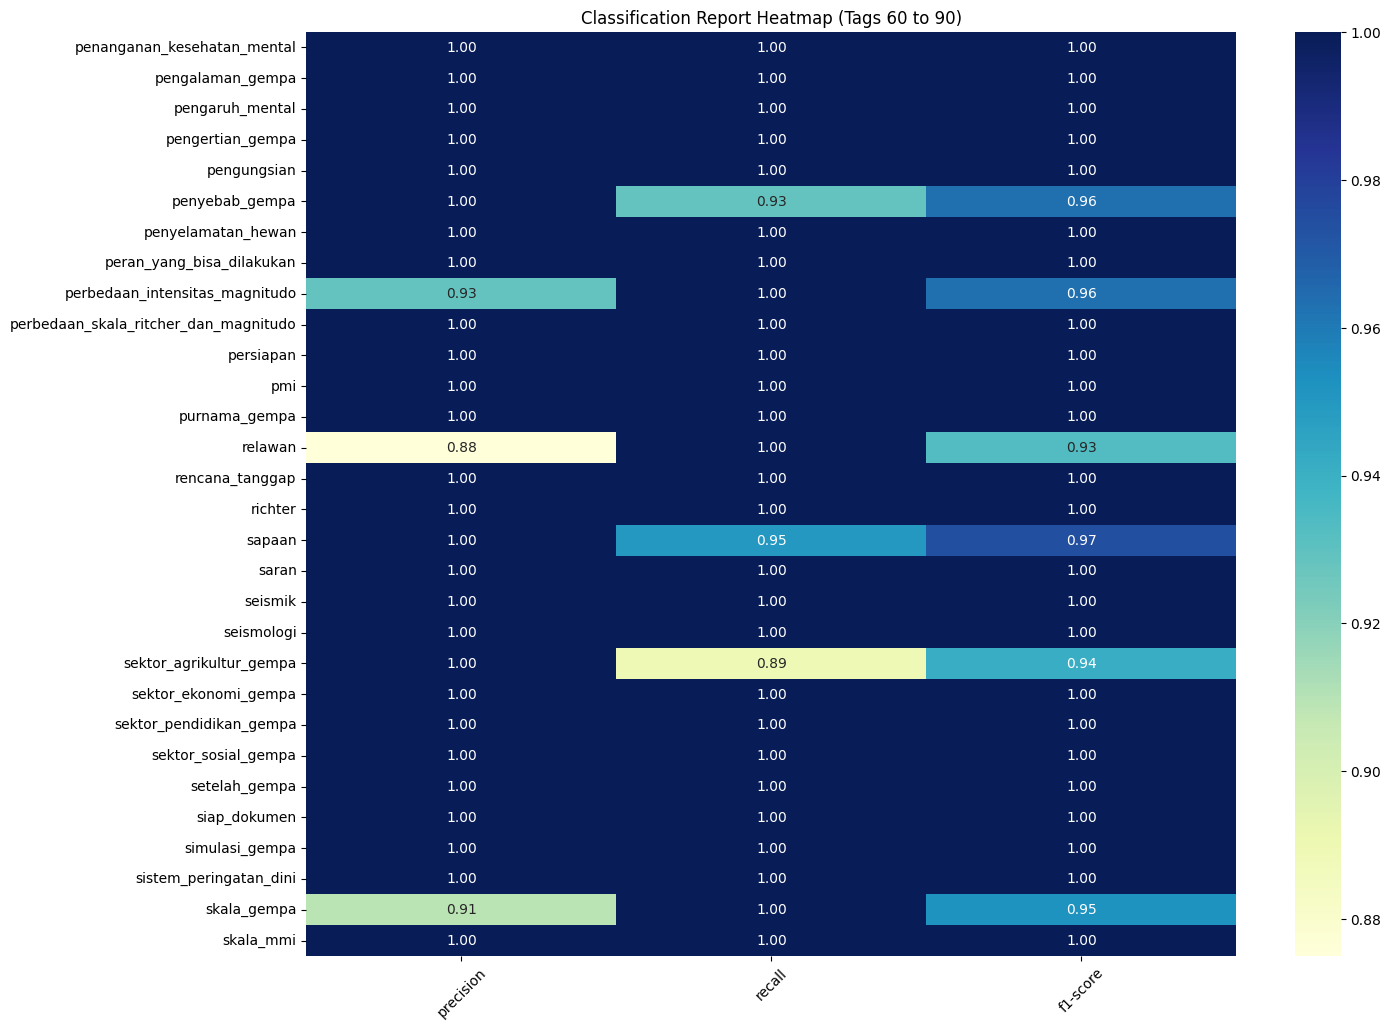

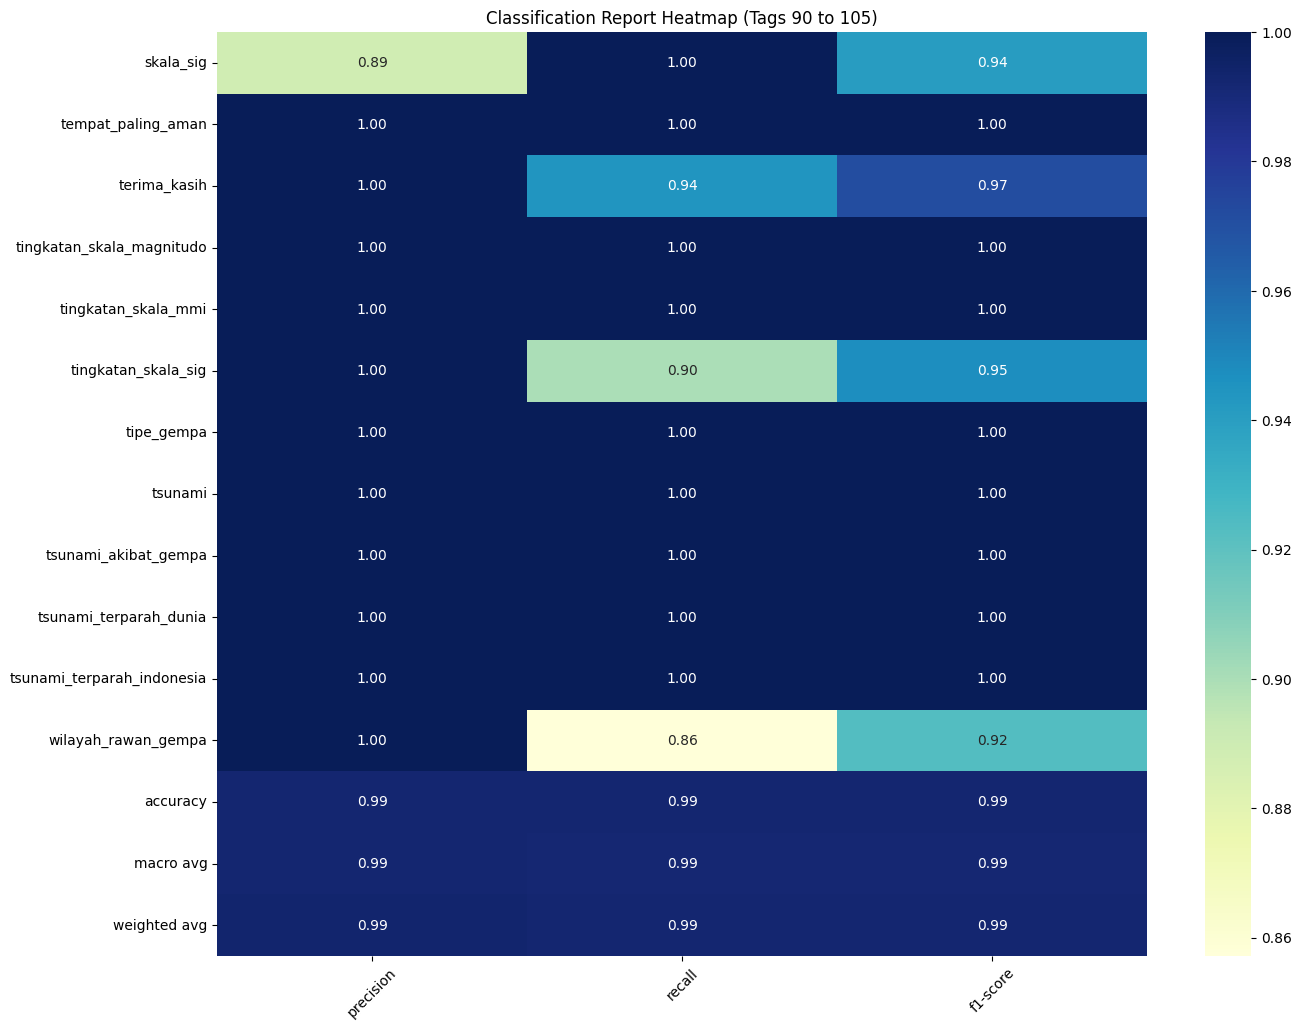

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np

# Parse the classification report
report_dict = classification_report(true_classes, predicted_classes, target_names=classes, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Drop the support column as it's not needed for the plot
report_df = report_df.drop(columns=["support"])

# Function to plot a heatmap for a subset of classes
def plot_heatmap_subset(report_subset, start_index, end_index):
    metrics = report_subset[['precision', 'recall', 'f1-score']].copy()
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.heatmap(metrics, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)
    ax.set_title(f'Classification Report Heatmap (Tags {start_index} to {end_index})')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Number of tags per plot
tags_per_plot = 30

# Total number of classes
total_classes = len(report_df)

# Loop through the classes in chunks of 50
for i in range(0, total_classes, tags_per_plot):
    start_index = i
    end_index = min(i + tags_per_plot, total_classes)
    plot_heatmap_subset(report_df[start_index:end_index], start_index, end_index)


In [ ]:
# Load intents.json, words, classes, and the trained model
intents = json.loads(open('/content/intents.json').read())
words = pickle.load(open('/content/words.pkl', 'rb'))
classes = pickle.load(open('/content/classes.pkl', 'rb'))
model = load_model('/content/chatbotmodel.h5')

# Function to clean up a sentence by tokenizing and stemming the words
def clean_up_sentence(sentence):
    sentence_words = word_tokenize(sentence)
    sentence_words = [stemmer.stem(word) for word in sentence_words]
    return sentence_words

# Function to convert a sentence into a bag of words array
def bag_of_words(sentence):
    sentence_words= clean_up_sentence(sentence)
    bag = [0] * len(words)
    for w in sentence_words:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1
    print(f"Bag of words: {bag}")  # Print the bag of words array
    return np.array(bag)

# Function to predict the class of a given sentence
def predict_class(sentence):
    bow = bag_of_words(sentence)
    res = model.predict(np.array([bow]))[0]
    ERROR_THRESHOLD = 0.25 # Only consider predictions above this threshold
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True) # Sort by probability
    return_list = []
    for r in results:
        return_list.append({'intent': classes[r[0]], 'probability': str(r[1])}) # Print the predictions for debugging
    print(f"Prediction probabilities: {return_list}")
    return return_list

# Function to get a response based on the predicted intents
def get_response(intents_list, intents_json):
    if not intents_list:
        return "Maaf, saya tidak mengerti apa yang Anda maksud."
    tag = intents_list[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            return random.choice(i['responses'])
    return "Maaf, saya tidak mengerti apa yang Anda maksud."

# Function to initiate the chat
def chat():
    print("Hi!!. Saya adalah QuakeBot, assisten virtual yang siap menjawab pertanyaan yang anda miliki mengenai Gempa Bumi. Silahkan bertanya!! ")
    while True:
        message = input("| Kamu: ")
        ints = predict_class(message)
        res = get_response(ints, intents)
        print("| Bot:", res)

        # Check if the predicted intent is "thanks"
        if ints and ints[0]['intent'] == "terima_kasih":
            print("Terima kasih")
            break

In [ ]:
# Call the chat function to start the bot
chat()

Hi!!. Saya adalah QuakeBot, assisten virtual yang siap menjawab pertanyaan yang anda miliki mengenai Gempa Bumi. Silahkan bertanya!! 
| Kamu: Pengertian gempa
Bag of words: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
chat()


Hi!!. Saya adalah QuakeBot, assisten virtual yang siap menjawab pertanyaan yang anda miliki mengenai Gempa Bumi. Silahkan bertanya!! 
| Kamu: Hubungan sektor agrikultur dengan gempa
1/1 [==============================] - 0s 22ms/step
Prediction probabilities: [{'intent': 'sektor_agrikultur_gempa', 'probability': '0.9946741'}]
| Bot: Gempa bumi dapat menyebabkan kerusakan signifikan pada infrastruktur dan sarana pertanian, seperti penggilingan padi, irigasi, dan lain-lain, yang dapat menghambat proses produksi pertanian. Selain itu, gempa bumi juga dapat menyebabkan trauma pada petani, sehingga mereka tidak dapat menggarap lahan mereka, mengganggu rantai pasok dan harga komoditas pangan yang naik. Gempa bumi juga dapat mempengaruhi produktivitas dan kualitas ternak, serta mengganggu pengelolaan sapi potong model integrasi padi-ternak yang sudah berjalan dengan baik
| Kamu: terima kasih
1/1 [==============================] - 0s 21ms/step
Prediction probabilities: [{'intent': 'terima_kasi

# **Comparision**




# **Before**

Ini adalah model sebelumnya

In [ ]:
# Load intents.json
intents = json.loads(open('/content/intents.json').read())

# Initialize lists to hold words, classes, and documents
words = []
classes = []
documents = []
ignore_letters = ['?', '!',',','.']

# Process each pattern in the intents
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # Tokenize each pattern
        word_list = word_tokenize(pattern)
        words.extend(word_list)
        # Add the tokenized pattern and its associated tag to documents
        documents.append((word_list, intent['tag']))
        # Add the tag to classes if it's not already present
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# Stem and lower each word and remove duplicates and ignored letters
words = [stemmer.stem(word) for word in words if word not in ignore_letters]
words = sorted(set(words))
classes = sorted(set(classes))

# Save the words and classes to pickle files
pickle.dump(words, open('/content/Banding/words.pkl', 'wb'))
pickle.dump(classes, open('/content/Banding/classes.pkl', 'wb'))

# Initialize the training data
training = []
output_empty = [0] * len(classes)

# Create the bag of words and output row for each document
for document in documents:
    bag =[]
    word_patterns = document[0]
    word_patterns = [stemmer.stem(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

# Shuffle the training data
random.shuffle(training)
training = np.array(training, dtype=object)

# Create train_x and train_y
train_x = np.array([i[0] for i in training])
train_y = np.array([i[1] for i in training])

In [ ]:
# Build the model
model = Sequential()
model.add(Input(shape=(len(train_x[0]),)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile the model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model
hist = model.fit(train_x, train_y, epochs=50, batch_size=5, validation_split=0.2, verbose=1)

# Save the model
model.save('/content/Banding/chatbotmodel.h5', hist)

print('Done')

Epoch 1/50
169/169 [==============================] - 4s 5ms/step - loss: 4.6161 - accuracy: 0.0190 - val_loss: 4.5831 - val_accuracy: 0.0427
Epoch 2/50
169/169 [==============================] - 1s 4ms/step - loss: 4.5352 - accuracy: 0.0403 - val_loss: 4.4986 - val_accuracy: 0.0521
Epoch 3/50
169/169 [==============================] - 1s 4ms/step - loss: 4.3435 - accuracy: 0.0546 - val_loss: 4.2215 - val_accuracy: 0.0806
Epoch 4/50
169/169 [==============================] - 1s 4ms/step - loss: 4.0401 - accuracy: 0.0878 - val_loss: 3.8093 - val_accuracy: 0.1706
Epoch 5/50
169/169 [==============================] - 1s 4ms/step - loss: 3.6583 - accuracy: 0.1400 - val_loss: 3.3893 - val_accuracy: 0.2038
Epoch 6/50
169/169 [==============================] - 1s 4ms/step - loss: 3.3312 - accuracy: 0.1886 - val_loss: 2.9800 - val_accuracy: 0.2512
Epoch 7/50
169/169 [==============================] - 1s 4ms/step - loss: 2.9765 - accuracy: 0.2266 - val_loss: 2.6654 - val_accuracy: 0.3318
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model and data
model = load_model('/content/Banding/chatbotmodel.h5')
classes = pickle.load(open('/content/Banding/classes.pkl', 'rb'))

# Predict the classes for the training data
predictions = model.predict(train_x)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(train_y, axis=1)

# Classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=classes)
print(report)


33/33 [==============================] - 0s 2ms/step
Classification Report:
                                       precision    recall  f1-score   support

                               P_wave       1.00      1.00      1.00        18
                               S_wave       0.94      1.00      0.97        17
                           aftershock       1.00      1.00      1.00         9
                      alat_ukur_gempa       1.00      1.00      1.00        13
                 bangunan_tahan_gempa       1.00      1.00      1.00         5
                  bantuan_pasca_gempa       0.86      0.75      0.80         8
                             basarnas       1.00      1.00      1.00        12
               bisakah_prediksi_gempa       1.00      1.00      1.00         9
             bisakah_prediksi_tsunami       1.00      1.00      1.00         9
                                 bmkg       1.00      1.00      1.00        12
                                 bnpb       1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


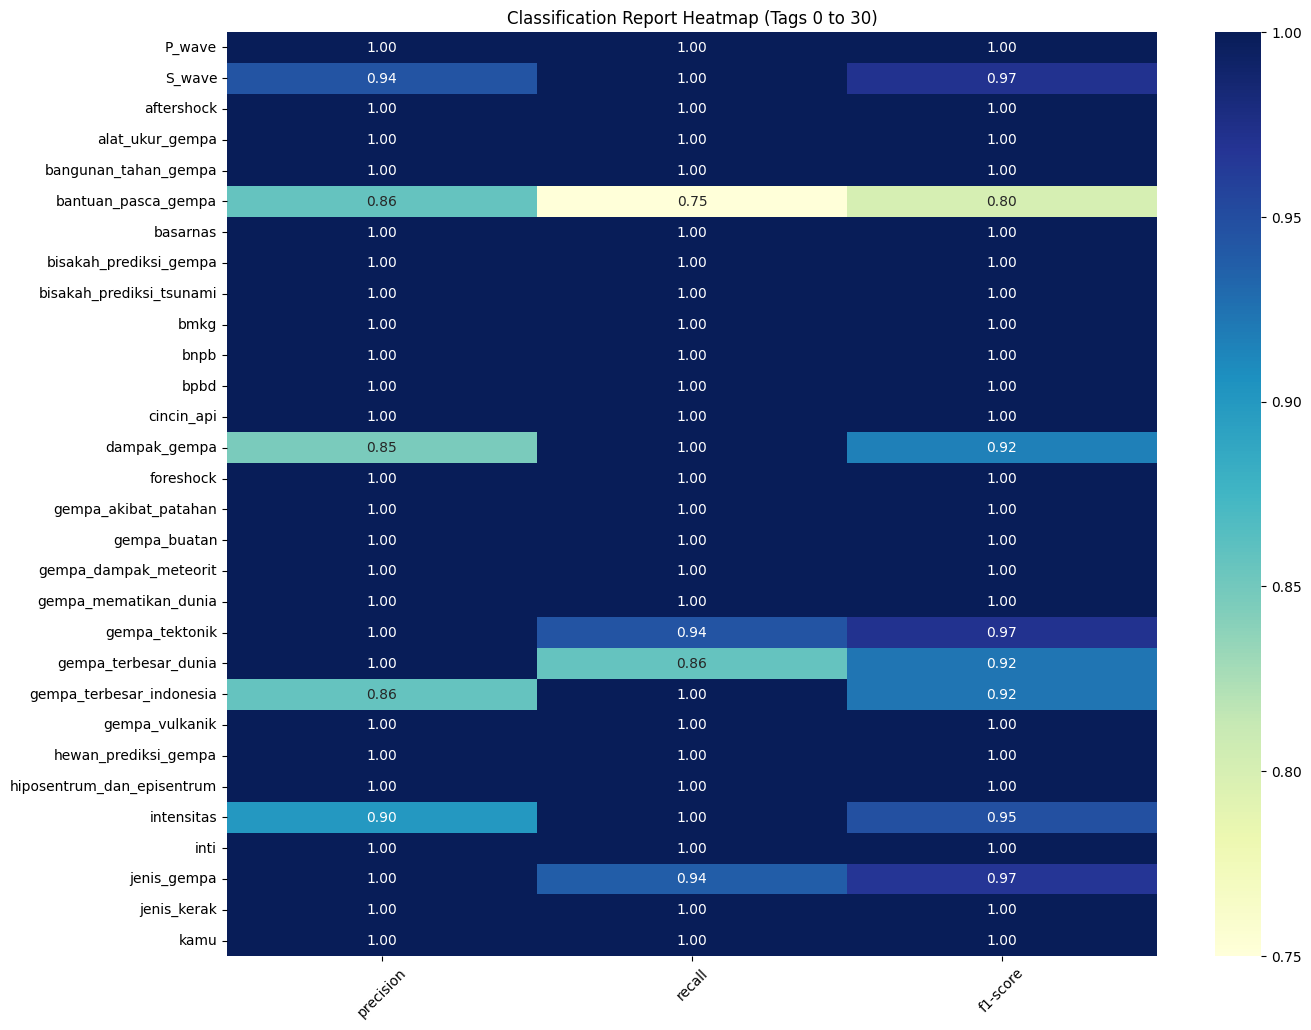

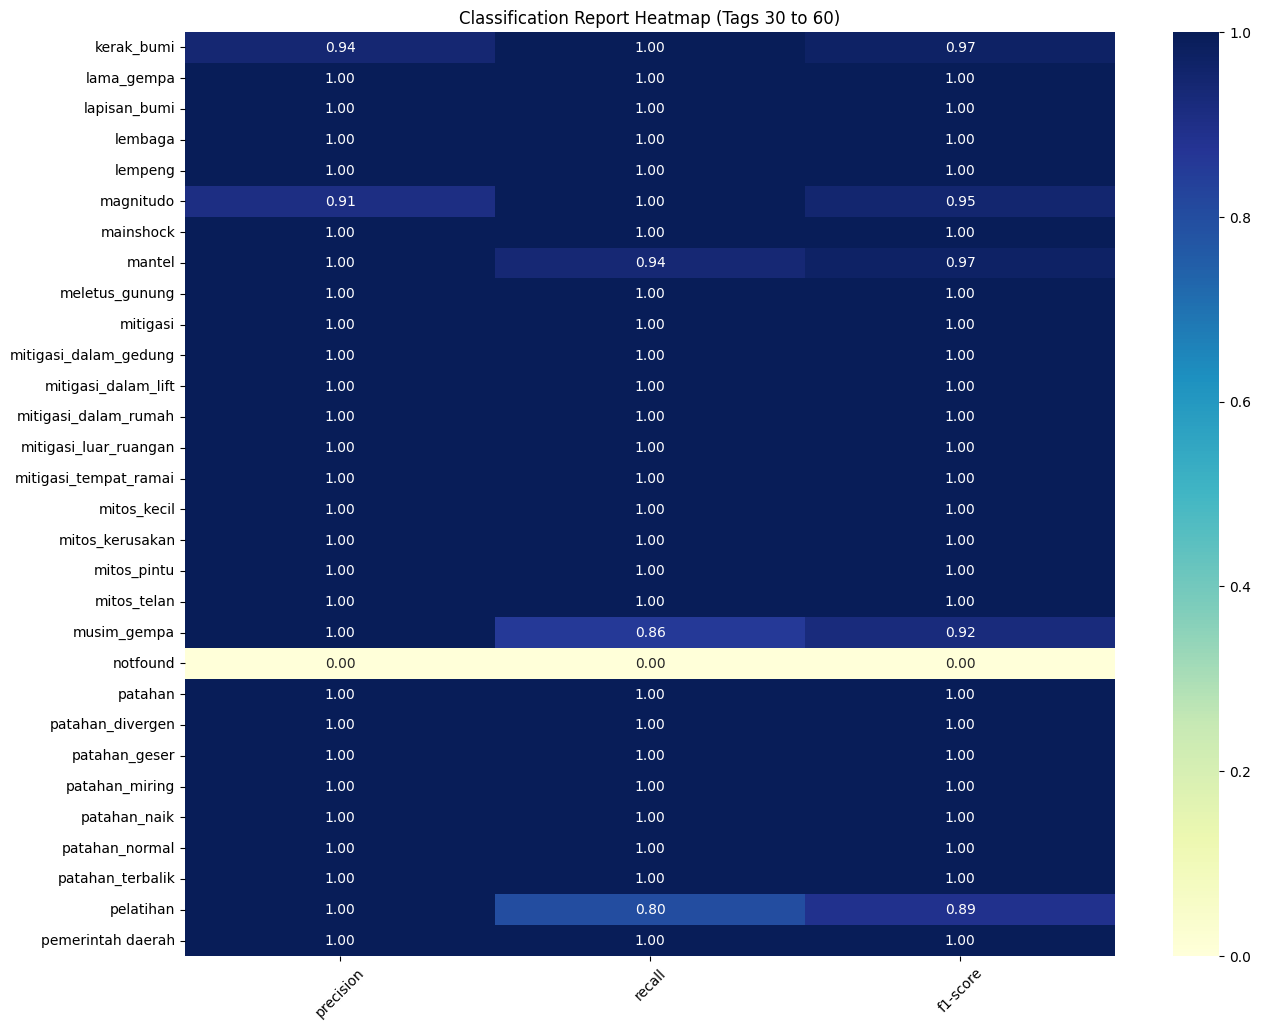

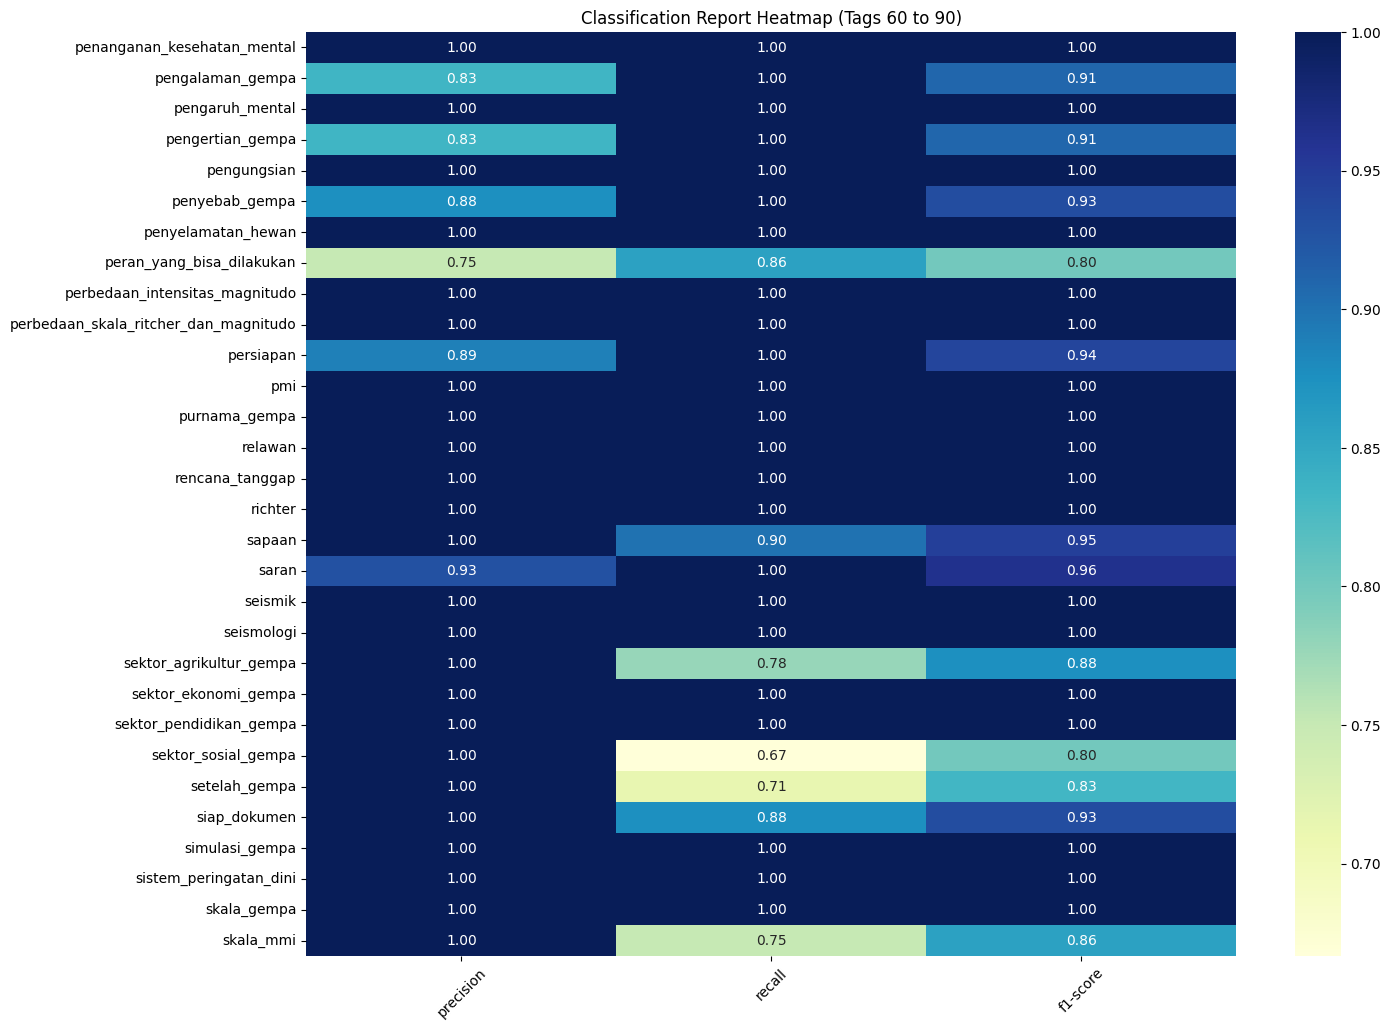

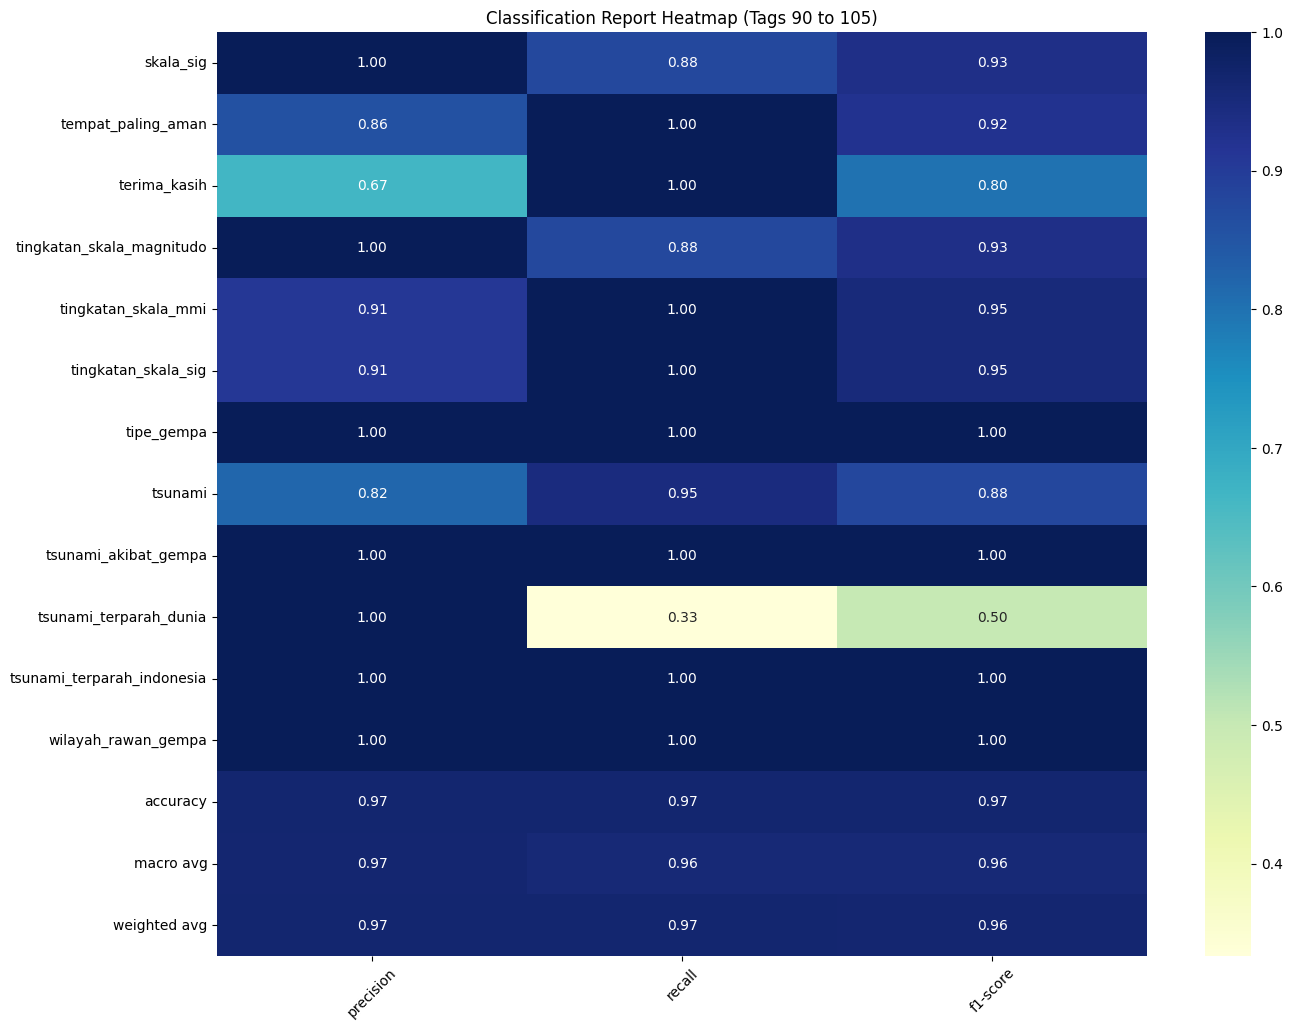

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np

# Parse the classification report
report_dict = classification_report(true_classes, predicted_classes, target_names=classes, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Drop the support column as it's not needed for the plot
report_df = report_df.drop(columns=["support"])

# Function to plot a heatmap for a subset of classes
def plot_heatmap_subset(report_subset, start_index, end_index):
    metrics = report_subset[['precision', 'recall', 'f1-score']].copy()
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.heatmap(metrics, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)
    ax.set_title(f'Classification Report Heatmap (Tags {start_index} to {end_index})')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Number of tags per plot
tags_per_plot = 30

# Total number of classes
total_classes = len(report_df)

# Loop through the classes in chunks of 50
for i in range(0, total_classes, tags_per_plot):
    start_index = i
    end_index = min(i + tags_per_plot, total_classes)
    plot_heatmap_subset(report_df[start_index:end_index], start_index, end_index)


In [ ]:
# Load intents.json, words, classes, and the trained model
intents = json.loads(open('/content/intents.json').read())
words = pickle.load(open('/content/Banding/words.pkl', 'rb'))
classes = pickle.load(open('/content/Banding/classes.pkl', 'rb'))
model = load_model('/content/Banding/chatbotmodel.h5')

# Function to clean up a sentence by tokenizing and stemming the words
def clean_up_sentence(sentence):
    sentence_words = word_tokenize(sentence)
    sentence_words = [stemmer.stem(word) for word in sentence_words]
    return sentence_words

# Function to convert a sentence into a bag of words array
def bag_of_words(sentence):
    sentence_words= clean_up_sentence(sentence)
    bag = [0] * len(words)
    for w in sentence_words:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1
    print(f"Bag of words: {bag}")  # Print the bag of words array
    return np.array(bag)

# Function to predict the class of a given sentence
def predict_class(sentence):
    bow = bag_of_words(sentence)
    res = model.predict(np.array([bow]))[0]
    ERROR_THRESHOLD = 0.25 # Only consider predictions above this threshold
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True) # Sort by probability
    return_list = []
    for r in results:
        return_list.append({'intent': classes[r[0]], 'probability': str(r[1])}) # Print the predictions for debugging
    print(f"Prediction probabilities: {return_list}")
    return return_list

# Function to get a response based on the predicted intents
def get_response(intents_list, intents_json):
    if not intents_list:
        return "Maaf, saya tidak mengerti apa yang Anda maksud."
    tag = intents_list[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            return random.choice(i['responses'])
    return "Maaf, saya tidak mengerti apa yang Anda maksud."

# Function to initiate the chat
def chat():
    print("Hi!!. Saya adalah QuakeBot, assisten virtual yang siap menjawab pertanyaan yang anda miliki mengenai Gempa Bumi. Silahkan bertanya!! ")
    while True:
        message = input("| Kamu: ")
        ints = predict_class(message)
        res = get_response(ints, intents)
        print("| Bot:", res)

        # Check if the predicted intent is "thanks"
        if ints and ints[0]['intent'] == "terima_kasih":
            print("Terima kasih")
            break

In [ ]:
chat()

Hi!!. Saya adalah QuakeBot, assisten virtual yang siap menjawab pertanyaan yang anda miliki mengenai Gempa Bumi. Silahkan bertanya!! 
| Kamu: Pengertian gempa bumi
Bag of words: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# **Result**

# **Result**

Ini adalah perbandingan hasil dari model sebelumnya dengan model yang digunakan

33/33 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


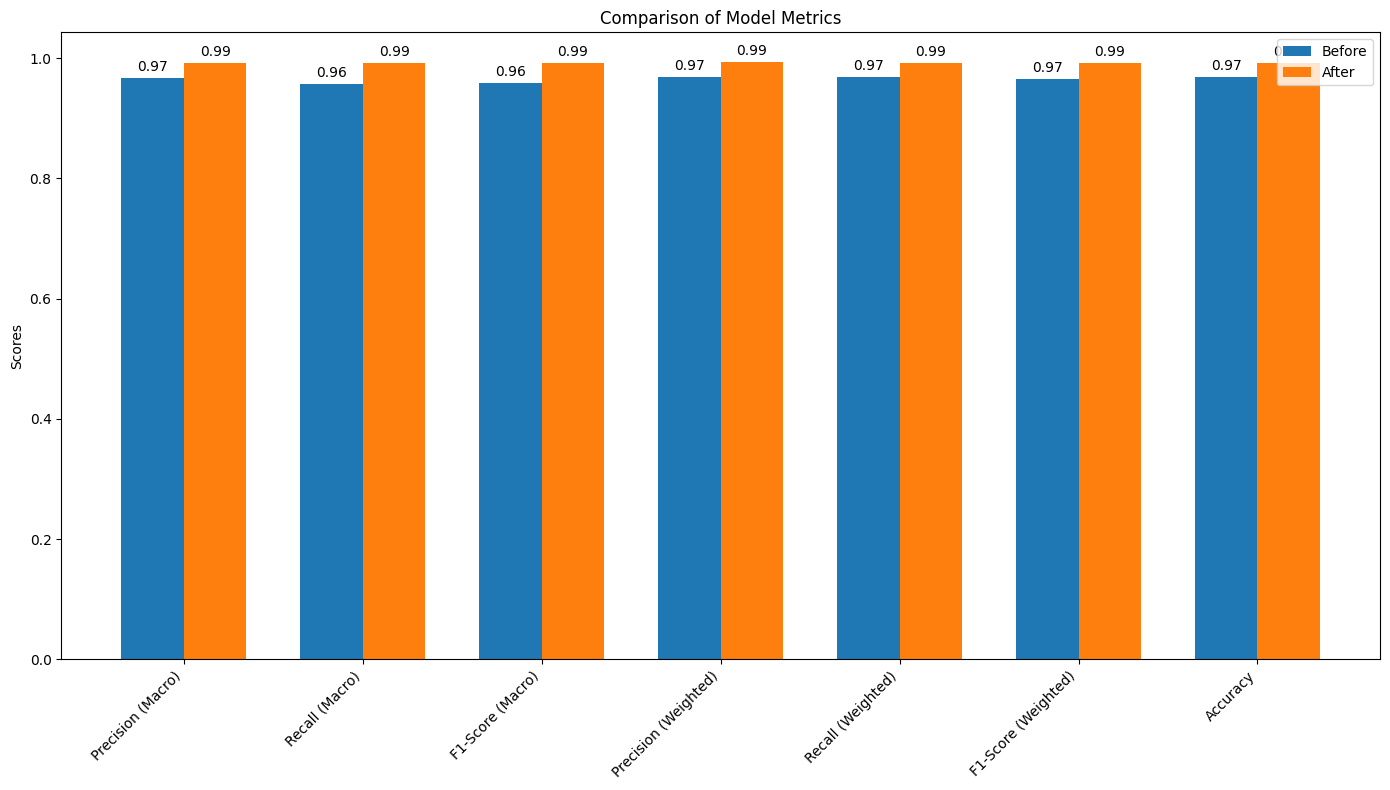

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.models import load_model
import pickle

# Assuming train_x and train_y are already defined and contain the training data and labels

# Load the models and classes
model1 = load_model('/content/Banding/chatbotmodel.h5')
classes1 = pickle.load(open('/content/Banding/classes.pkl', 'rb'))

model2 = load_model('/content/chatbotmodel.h5')
classes2 = pickle.load(open('/content/classes.pkl', 'rb'))

# Predict the classes for the training data
predictions1 = model1.predict(train_x)
predicted_classes1 = np.argmax(predictions1, axis=1)
true_classes1 = np.argmax(train_y, axis=1)

predictions2 = model2.predict(train_x)
predicted_classes2 = np.argmax(predictions2, axis=1)
true_classes2 = np.argmax(train_y, axis=1)

# Get classification reports
report1 = classification_report(true_classes1, predicted_classes1, target_names=classes1, output_dict=True)
report2 = classification_report(true_classes2, predicted_classes2, target_names=classes2, output_dict=True)

# Extract macro and weighted averages for precision, recall, f1-score and accuracy
metrics1 = {
    'precision_macro': report1['macro avg']['precision'],
    'recall_macro': report1['macro avg']['recall'],
    'f1-score_macro': report1['macro avg']['f1-score'],
    'precision_weighted': report1['weighted avg']['precision'],
    'recall_weighted': report1['weighted avg']['recall'],
    'f1-score_weighted': report1['weighted avg']['f1-score'],
    'accuracy': report1['accuracy']
}

metrics2 = {
    'precision_macro': report2['macro avg']['precision'],
    'recall_macro': report2['macro avg']['recall'],
    'f1-score_macro': report2['macro avg']['f1-score'],
    'precision_weighted': report2['weighted avg']['precision'],
    'recall_weighted': report2['weighted avg']['recall'],
    'f1-score_weighted': report2['weighted avg']['f1-score'],
    'accuracy': report2['accuracy']
}

# Organize data for plotting
labels = ['Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)', 'Accuracy']
data1 = [metrics1['precision_macro'], metrics1['recall_macro'], metrics1['f1-score_macro'],
         metrics1['precision_weighted'], metrics1['recall_weighted'], metrics1['f1-score_weighted'], metrics1['accuracy']]
data2 = [metrics2['precision_macro'], metrics2['recall_macro'], metrics2['f1-score_macro'],
         metrics2['precision_weighted'], metrics2['recall_weighted'], metrics2['f1-score_weighted'], metrics2['accuracy']]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, data1, width, label='Before')
rects2 = ax.bar(x + width/2, data2, width, label='After')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Add data labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()
plt.show()


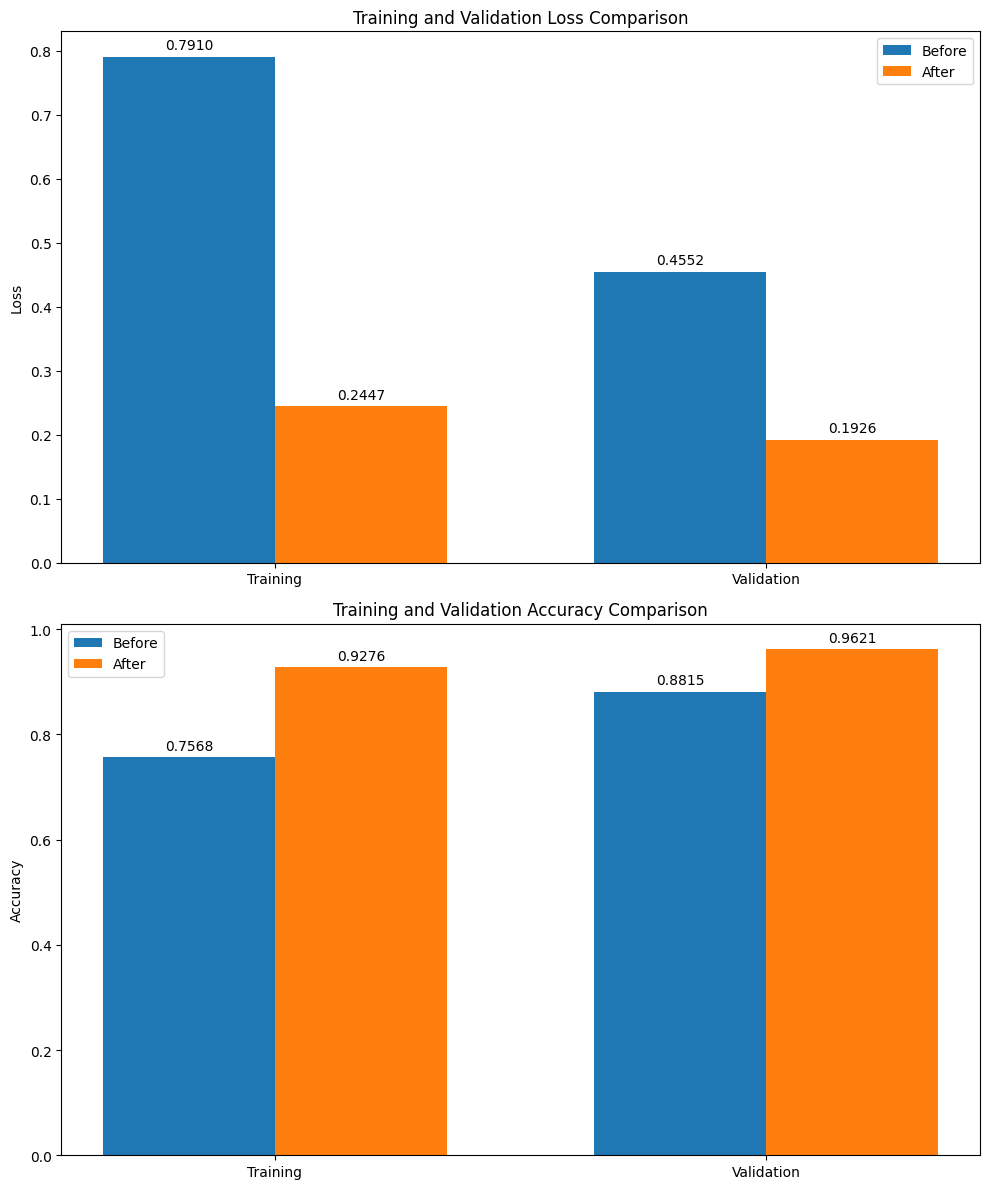

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for comparison
labels = ['Training', 'Validation']
metrics = ['Loss', 'Accuracy']

# Before scenario
before_loss = [0.7910, 0.4552]
before_accuracy = [0.7568, 0.8815]

# After scenario
after_loss = [0.2447, 0.1926]
after_accuracy = [0.9276, 0.9621]

# Organize data for plotting
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plotting loss
rects1 = axs[0].bar(x - width/2, before_loss, width, label='Before')
rects2 = axs[0].bar(x + width/2, after_loss, width, label='After')

axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(axs[0], rects1)
add_labels(axs[0], rects2)

# Plotting accuracy
rects3 = axs[1].bar(x - width/2, before_accuracy, width, label='Before')
rects4 = axs[1].bar(x + width/2, after_accuracy, width, label='After')

axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()

add_labels(axs[1], rects3)
add_labels(axs[1], rects4)

fig.tight_layout()
plt.show()


33/33 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


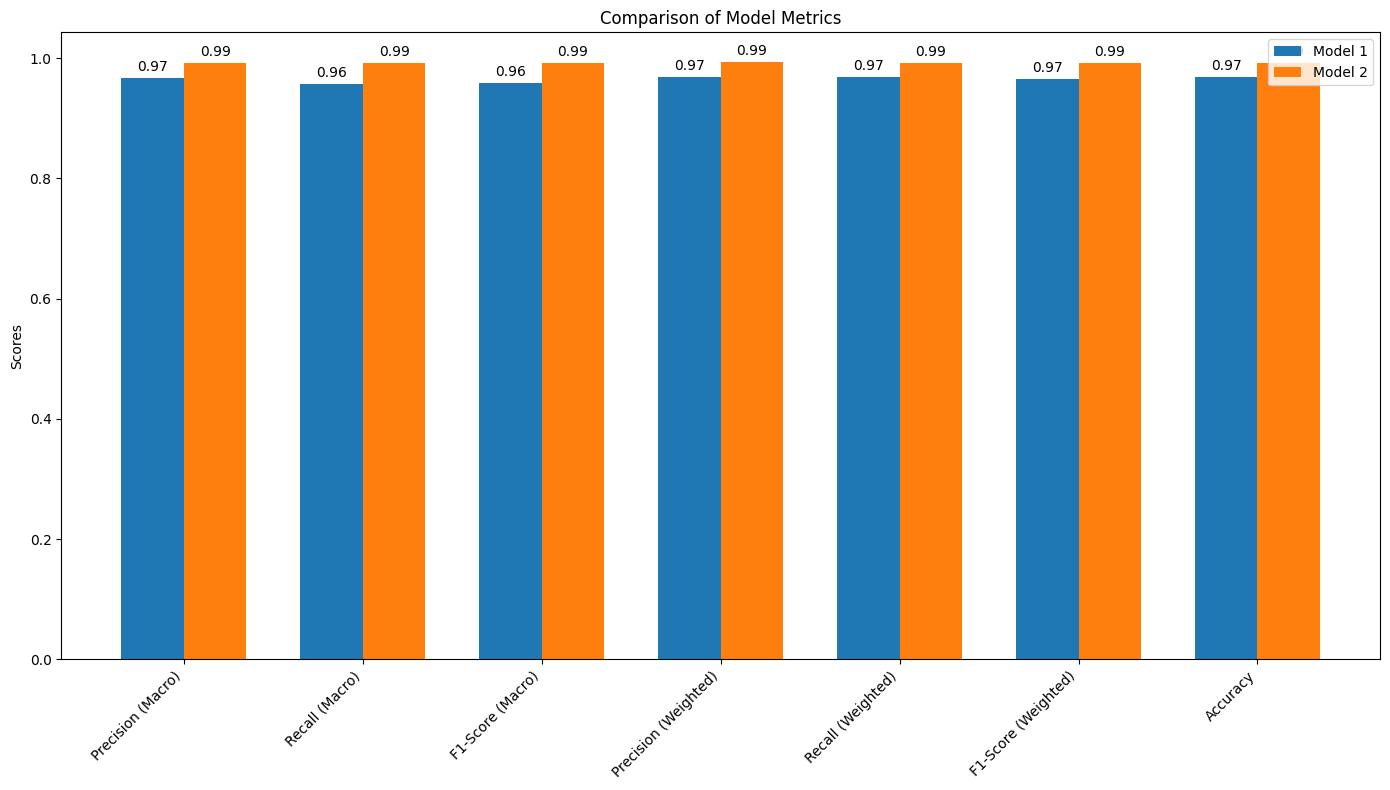

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.models import load_model
import pickle

# Assuming train_x and train_y are already defined and contain the training data and labels

# Load the models and classes
model1 = load_model('/content/Banding/chatbotmodel.h5')
classes1 = pickle.load(open('/content/Banding/classes.pkl', 'rb'))

model2 = load_model('/content/chatbotmodel.h5')
classes2 = pickle.load(open('/content/classes.pkl', 'rb'))

# Predict the classes for the training data
predictions1 = model1.predict(train_x)
predicted_classes1 = np.argmax(predictions1, axis=1)
true_classes1 = np.argmax(train_y, axis=1)

predictions2 = model2.predict(train_x)
predicted_classes2 = np.argmax(predictions2, axis=1)
true_classes2 = np.argmax(train_y, axis=1)

# Get classification reports
report1 = classification_report(true_classes1, predicted_classes1, target_names=classes1, output_dict=True)
report2 = classification_report(true_classes2, predicted_classes2, target_names=classes2, output_dict=True)

# Extract macro and weighted averages for precision, recall, f1-score and accuracy
metrics1 = {
    'precision_macro': report1['macro avg']['precision'],
    'recall_macro': report1['macro avg']['recall'],
    'f1-score_macro': report1['macro avg']['f1-score'],
    'precision_weighted': report1['weighted avg']['precision'],
    'recall_weighted': report1['weighted avg']['recall'],
    'f1-score_weighted': report1['weighted avg']['f1-score'],
    'accuracy': report1['accuracy']
}

metrics2 = {
    'precision_macro': report2['macro avg']['precision'],
    'recall_macro': report2['macro avg']['recall'],
    'f1-score_macro': report2['macro avg']['f1-score'],
    'precision_weighted': report2['weighted avg']['precision'],
    'recall_weighted': report2['weighted avg']['recall'],
    'f1-score_weighted': report2['weighted avg']['f1-score'],
    'accuracy': report2['accuracy']
}

# Organize data for plotting
labels = ['Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)', 'Accuracy']
data1 = [metrics1['precision_macro'], metrics1['recall_macro'], metrics1['f1-score_macro'],
         metrics1['precision_weighted'], metrics1['recall_weighted'], metrics1['f1-score_weighted'], metrics1['accuracy']]
data2 = [metrics2['precision_macro'], metrics2['recall_macro'], metrics2['f1-score_macro'],
         metrics2['precision_weighted'], metrics2['recall_weighted'], metrics2['f1-score_weighted'], metrics2['accuracy']]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, data1, width, label='Before')
rects2 = ax.bar(x + width/2, data2, width, label='After')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Add data labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()
plt.show()
